## Perceptron demo

### Here we will implement a perceptron and visualize its learning process. 

In [1]:
import random
import time
import numpy as np
import matplotlib
matplotlib.use("nbagg")  # backend for interactive figure that allows plot update
import matplotlib.pyplot as plt
# magic function to tell matplotlib to allow interactive plot
%matplotlib notebook 

In [2]:
%%javascript
//This is a Javascript code block that disables auto-scrolling so we can see the full figure
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

We will generate some linearly separable points for perceptron to learn to classify. We do this by first generate a bunch of random points. Then we generate a random line. This line is what perceptron needs to learn from data and find. Then we assign the points a value of either -1 or 1 according to which side of the line the points are on. 

In [3]:
def generate_points(N):
    '''
    This function generates N random points and assign a value of -1 or 1 
    according to which side of a randomly generated line the point is on. 
    '''
    X = []
    
    # Create a line (Ground truth)
    xA, yA, xB, yB = [random.uniform(-1, 1) for i in range(4)]
    V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
    
    # Generate random points, assign value 1 for points on one side of the line and -1 for the other
    for i in range(N):
        x1, x2 = [random.uniform(-1, 1) for i in range(2)]
        # The heaviside function phi(x) = 1 if z > thresh else -1 cna be re-written as
        # phi(x) = 1 if z > 0 else -1 if we move the introduce x0 and move thresh to the left side of the formula,
        # i.e. phi(x) = w0 * x0 + w1 * x1 + w2 * x2  and here w0 = -thresh
        x = np.array([1, x1, x2])
        s = int(np.sign(V.T.dot(x)))
        X.append((x, s))
    return X

In [4]:
def find_misclassified_point(vec, pts=None):
    '''
    This function compares the value predicted by the perceptron and the 
    ground truth and returns mis-classified points. 
    '''
    mispts = []
    for x,s in X:
        if np.sign(vec.T.dot(x)) != s:
            mispts.append((x, s))
    return mispts

In [5]:
def plot(vec=[], mispts=()):
    
    l = np.linspace(-1, 1)
    ax.cla()
    cols = {1: 'r', -1: 'b'}
    
    for x, s in X:
        ax.plot(x[1], x[2], cols[s]+'o')
    if mispts:
        ax.plot(mispts[0][1], mispts[0][2], 'yx', markersize=10)
    if any(vec):
        aa, bb = -vec[1]/vec[2], -vec[0]/vec[2]
        ax.plot(l, aa*l+bb, 'g-', lw=2)
        
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_title('N = {:d}, Iteration {:d}'.format(len(X), iteration))
    
    fig.canvas.draw()
    
    time.sleep(0.5)

In [6]:
def perceptron(save=False):
    '''
    Thie function creates perceptron with weights initialized to zero and update its weight 
    using a randomly chosen misclassified point.  
    '''
    global iteration
    iteration = 0
    
    # Initialize all weights to zero.
    w = np.zeros(3)
    plot(vec=w)
    
    # Find misclassfied points
    mispts = find_misclassified_point(w)
    
    # Iterate until all points are correctly classified
    while len(mispts) != 0:
        iteration += 1

        # Randomly pick a misclassified point
        x, s = mispts[random.randrange(0, len(mispts))]

        # Update weights
        w += s*x

        # Plot result
        plot(vec=w, mispts=(x, s))
        if save:
            ax.savefig('p_N{:d}_it{:d}'.format(len(X), iteration), dpi=200, bbox_inches='tight')
        
        # Find misclassfied points
        mispts = find_misclassified_point(w)
    

<IPython.core.display.Javascript object>


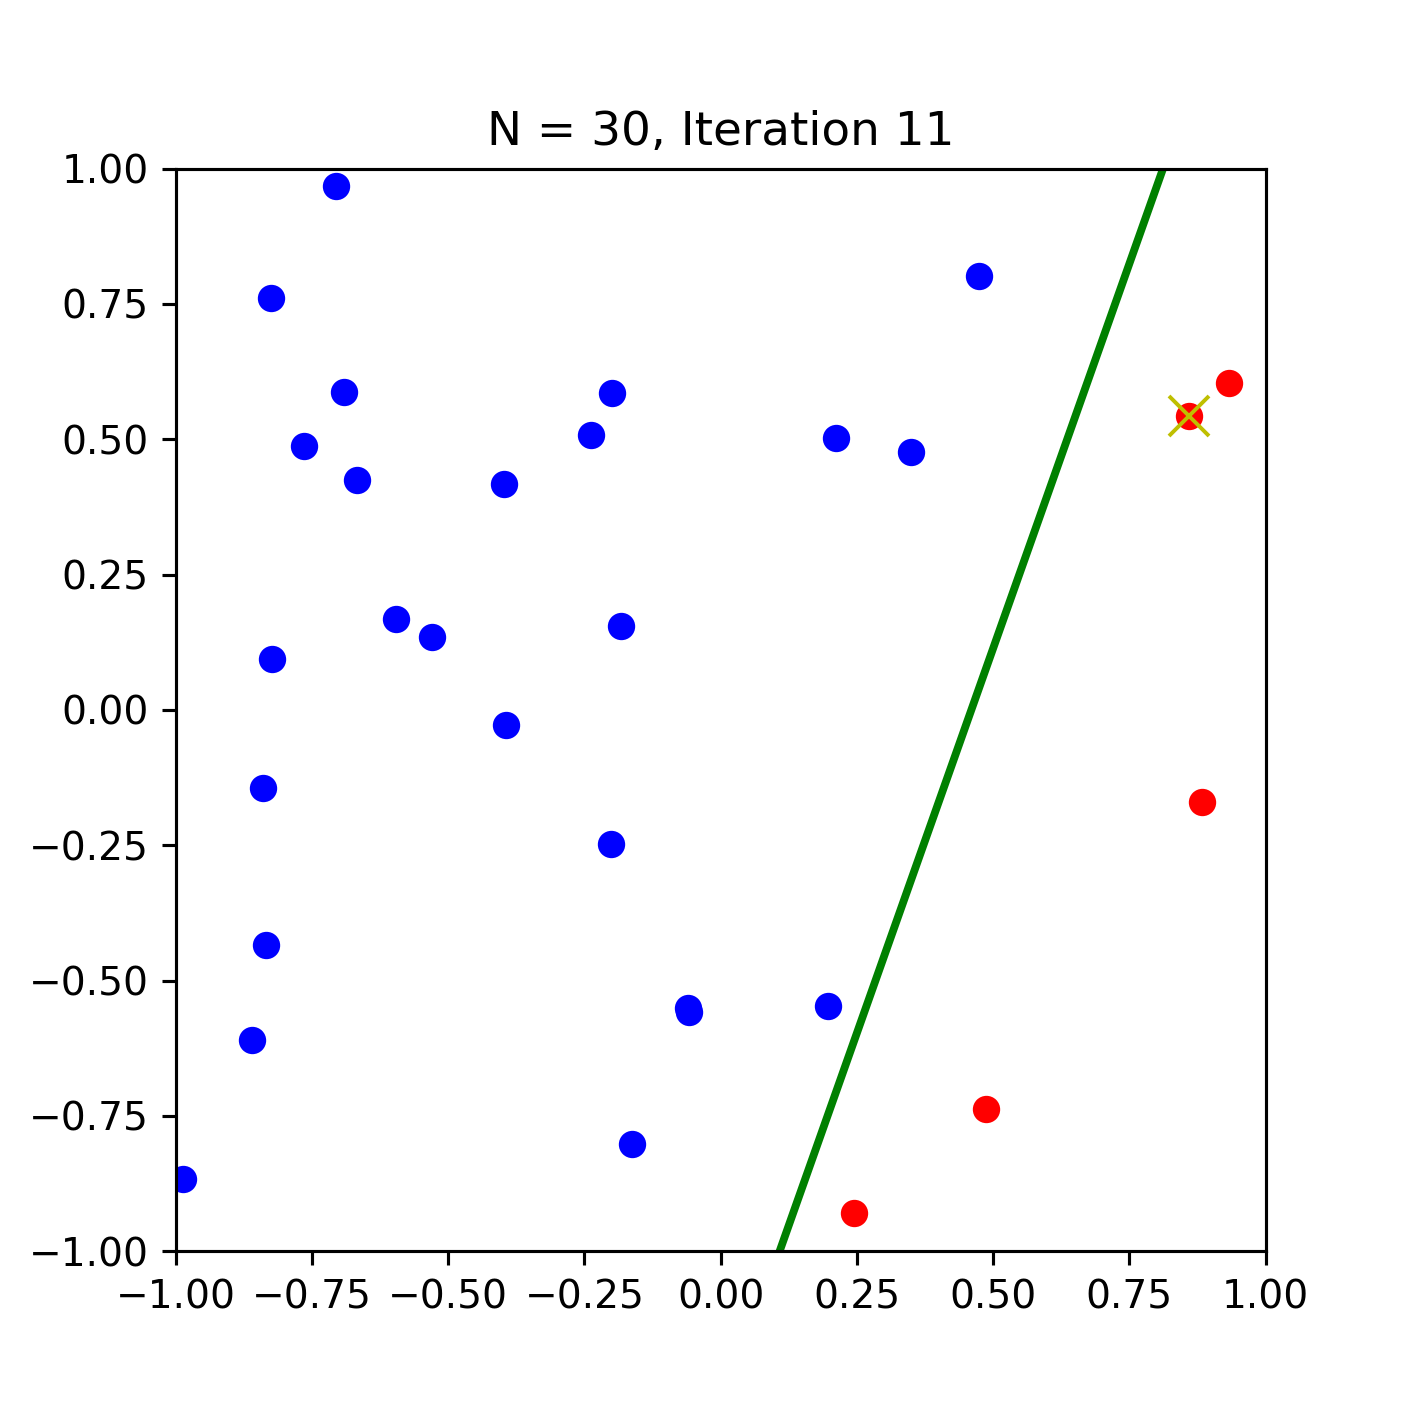

In [7]:
X = generate_points(30)
fig, ax = plt.subplots(1,1, figsize=(5,5))

In [8]:
perceptron()